# How to build a sales forecast in Python

We will use linear regression to determine the impact of shelf location on sales of Oreos. This dataset is from Wayne L. Winston’s Marketing Analytics: Data-Driven Techniques with Microsoft Excel. Chapter 10 is all about forecasting.I will replicate the forecast exercise done originally in Excel, but in Python.

## Import packages

In [2]:
#Locate imported packages
import sys
sys.path

#import pandas and numpy
import pandas as pd
import numpy as np

# Reading an excel file using Python
import os

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import Seaborn
import seaborn as sns

#Import statsmodels ols function
from statsmodels.formula.api import ols

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

##  Import & Inspect Dataset

In [3]:
# Give the location of your file - In this case an Excel spreadsheet
file = ('datasets/Oreos.xlsx')
 
#Load spreadsheet
data = pd.ExcelFile(file)

## Load a sheet into a DataFrame by name - The name of the sheet is "data"
df = data.parse('data')

#Check results
print(df.head())

   Observation  Height in feet  Sales
0            1               5     30
1            2               6     66
2            3               7     42
3            4               5     32
4            5               5     25


Our Oreos dataset has 3 columns:
	1.	Observation number
	2.	Height in feet
	3.	Sales

In [4]:
# We need to change column name for Height in feet column
# Let's remove the extra whitespace
df.columns = df.columns.str.replace(' ', '')

#Check results
print(df.columns.tolist())

['Observation', 'Heightinfeet', 'Sales']


In [5]:
# Check column data types and check for non-missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Observation   12 non-null     int64
 1   Heightinfeet  12 non-null     int64
 2   Sales         12 non-null     int64
dtypes: int64(3)
memory usage: 416.0 bytes
None


## Exploratory Data Analysis & Visualization

Let's visualize our dataset.

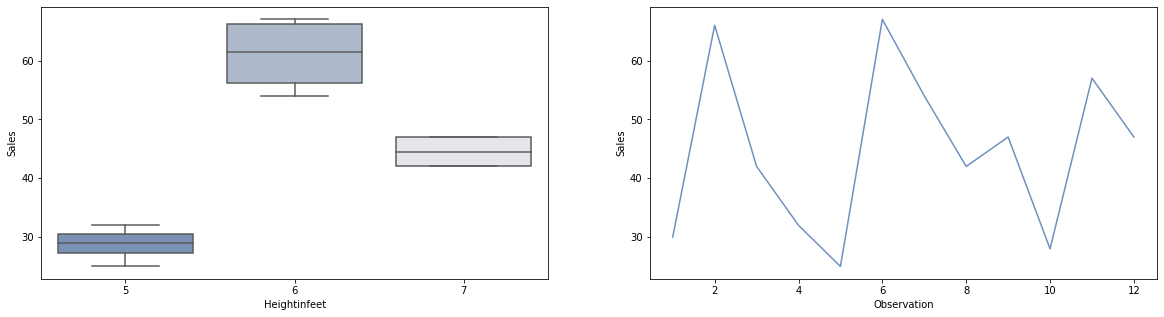

In [6]:
# Set the color palette
sns.set_palette(sns.color_palette("vlag"))

#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,5))

#See the distribution of the data
sns.boxplot(data=df, x="Heightinfeet", y="Sales", ax=ax[0])
sns.lineplot(data=df, x="Observation", y="Sales", ax=ax[1])


#Show plot
plt.show()

In [7]:
#What is average sales overall?
df['Sales'].mean()

44.75

In [8]:
#What is the average sales?
#Group by heightinfeet and take mean of sales
df.groupby('Heightinfeet')['Sales'].mean()

Heightinfeet
5    28.75
6    61.00
7    44.50
Name: Sales, dtype: float64

**<font color=green>Insights from the data visualization</font>**

1. Overall average sales over the entire dataset is 44.75.
2. Higher sales when shelf height is at 6 feet. On average 61.
3. Lower sales when shelf height as at 5 feet. On average 44.50

## Forecast Modeling

In [9]:
#Convert Heightinfeet from numeric to categorical object
df['Heightinfeet'] = df['Heightinfeet'].astype('category') 

In [10]:
# Create the model object
forecast_model = ols("Sales ~ Heightinfeet", data=df)

# Fit the model
forecast_model = forecast_model.fit()

# Print the summary of the fitted model
print(forecast_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     52.67
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.08e-05
Time:                        07:00:31   Log-Likelihood:                -33.200
No. Observations:                  12   AIC:                             72.40
Df Residuals:                       9   BIC:                             73.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            28.7500      2.22

A positive coefficient indicates that as the value of the independent variable increases (height), the mean of the dependent variable (sales) also tends to increase.

At 5 feet sales are 28.75. Now we interpret 6 and 7 feet in relation to the 5 feet shelf location.

At 6 feet sales increase by 32.25 units, but at 7 feet sales are only increased by 15.75 units in relation 5 feet. Overall, 6 feet is better location for our Oreos.

p-values are <.05 for both independent variables


How do we write our equation if we want to use this linear model to forecast sales?

Sales = 28.75 + 32.25*(6 feet) + 15.75*(7 feet)

Luckily, for us we can use Python to do the math for us.

In [11]:
#Create new DataFrame to hold our future forecast
# Create explanatory_data 
explanatory_data = df

print(explanatory_data)

    Observation Heightinfeet  Sales
0             1            5     30
1             2            6     66
2             3            7     42
3             4            5     32
4             5            5     25
5             6            6     67
6             7            6     54
7             8            7     42
8             9            7     47
9            10            5     28
10           11            6     57
11           12            7     47


In [14]:
#Use forecast_model to predict future sales
future_sales = forecast_model.predict(explanatory_data)

In [16]:
# Create prediction_data
# Future_sales has been added as a column to the explanatory data DataFrame
prediction_data = explanatory_data.assign(
   future_sales = future_sales)

print(prediction_data)

    Observation Heightinfeet  Sales  future_sales
0             1            5     30         28.75
1             2            6     66         61.00
2             3            7     42         44.50
3             4            5     32         28.75
4             5            5     25         28.75
5             6            6     67         61.00
6             7            6     54         61.00
7             8            7     42         44.50
8             9            7     47         44.50
9            10            5     28         28.75
10           11            6     57         61.00
11           12            7     47         44.50


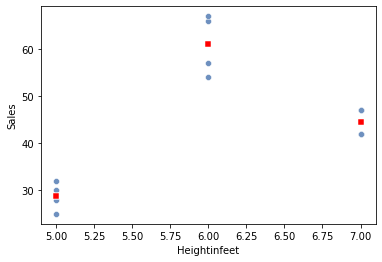

In [25]:
#Plot predictions, but first convert Heightinfeet back to numeric object
df['Heightinfeet'] = pd.to_numeric(df['Heightinfeet'])

# Plot first the scatter plot for our original data
fig = plt.figure()
sns.scatterplot(x="Heightinfeet",
            y="Sales",
            data=df)

# Add a scatter plot layer
sns.scatterplot(x="Heightinfeet",
            y="future_sales",
            data=prediction_data,
            color = "red",
            marker = "s")

# Show the plot
plt.show()